# PROJECT OVERVIEW

In today’s digital world, news articles are constantly being generated and shared across
different platforms. For news organizations, social media platforms, and aggregators,
classifying articles into specific categories such as sports, politics, and technology can help
improve content management and recommendation systems. This project aims to develop a
machine learning model that can classify news articles into predefined categories, such as
sports, politics, and technology, based on their content.
By automating this process, organizations can efficiently categorize large volumes of news
articles, making it easier for readers to access relevant information based on their interests.

# PROBLEM STATEMENT 

The primary objective of this project is to build a classification model that can automatically
categorize news articles into different predefined categories. The model will be trained using
a labeled dataset of news articles and will output the most likely category (e.g., sports,
politics, or technology) for any given article.
The goal is to:
1. Develop a robust classifier capable of handling articles from multiple categories.
2. Preprocess the text data, extract meaningful features, and train models to classify the
articles.
3. Evaluate the model performance and provide actionable insights on how well it
classifies articles.

In [55]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.tokenize import word_tokenize

# Downloading useful resources

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# TASK 1: DATA COLLECTION AND PREPROCESSING

In [49]:
# Load the dataset
df = pd.read_csv("C:/Users/Himanshu/Downloads/data_news.csv")

# Display dataset info
print(df.info())
print(df.head())
print(df['category'].value_counts())

# Drop missing values
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB
None
   category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https:

In [51]:
# Text Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Text Processing
df['processed_text'] = df['headline'] + ' ' + df['short_description']
df['processed_text'] = df['processed_text'].apply(clean_text)

# Tokenization
def tokenize_text(text):
    return word_tokenize(text)
df['tokenized_text'] = df['processed_text'].apply(tokenize_text)

# TASK 2: FEATURE EXTRACTION

In [52]:
# TF-IDF Feature Extraction
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['processed_text'])

# Bag of Words (BoW)
bow = CountVectorizer(max_features=5000)
X_bow = bow.fit_transform(df['processed_text'])
y = df['category']

# Train-Test Split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_bow, X_test_bow, _, _ = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# TASK 3: MODEL TRAINING

In [53]:

# Model Training & Evaluation with Cross-Validation
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Model: {model.__class__.__name__}")
    print(f"Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()
    
    print("-----------------------------------------")

# TASK 4: MODEL EVALUATION

Evaluating models with TF-IDF features:
Model: LogisticRegression
Cross-Validation Accuracy: 0.7828 (+/- 0.0042)
Test Accuracy: 0.7962395690292595
Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.74      0.75      0.74       908
 ENTERTAINMENT       0.76      0.78      0.77       923
  FOOD & DRINK       0.85      0.84      0.84       987
     PARENTING       0.79      0.77      0.78       900
      POLITICS       0.78      0.73      0.75       955
        SPORTS       0.87      0.88      0.88       968
STYLE & BEAUTY       0.86      0.84      0.85       903
        TRAVEL       0.81      0.79      0.80       958
      WELLNESS       0.71      0.78      0.74       969
    WORLD NEWS       0.81      0.80      0.80       996

      accuracy                           0.80      9467
     macro avg       0.80      0.80      0.80      9467
  weighted avg       0.80      0.80      0.80      9467



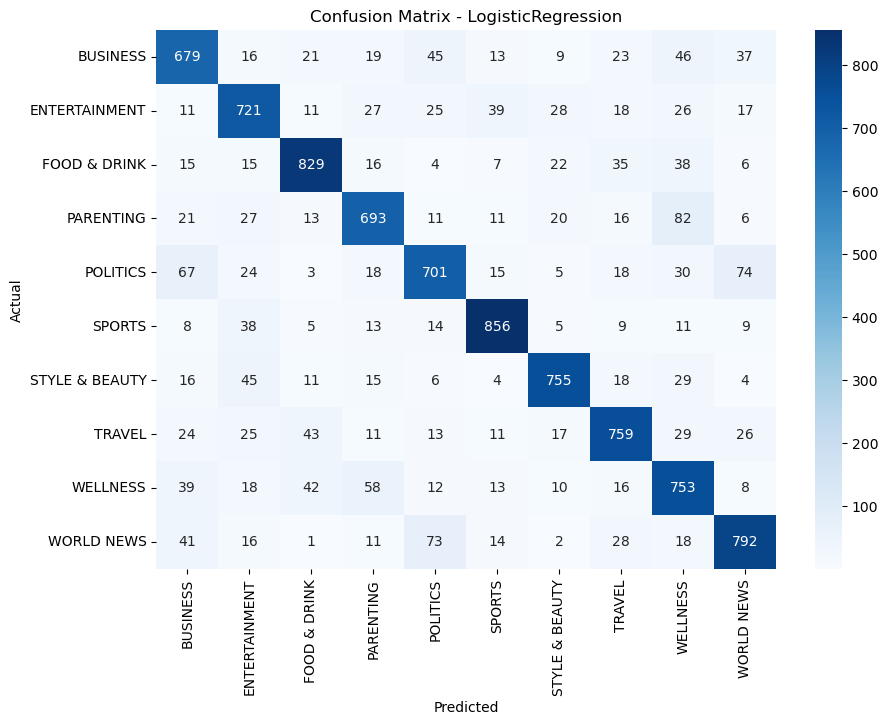

-----------------------------------------
Model: MultinomialNB
Cross-Validation Accuracy: 0.7742 (+/- 0.0044)
Test Accuracy: 0.7831414386817366
Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.76      0.69      0.72       908
 ENTERTAINMENT       0.78      0.76      0.77       923
  FOOD & DRINK       0.82      0.85      0.83       987
     PARENTING       0.71      0.77      0.74       900
      POLITICS       0.78      0.73      0.75       955
        SPORTS       0.88      0.85      0.86       968
STYLE & BEAUTY       0.83      0.81      0.82       903
        TRAVEL       0.78      0.81      0.80       958
      WELLNESS       0.70      0.75      0.72       969
    WORLD NEWS       0.81      0.81      0.81       996

      accuracy                           0.78      9467
     macro avg       0.78      0.78      0.78      9467
  weighted avg       0.78      0.78      0.78      9467



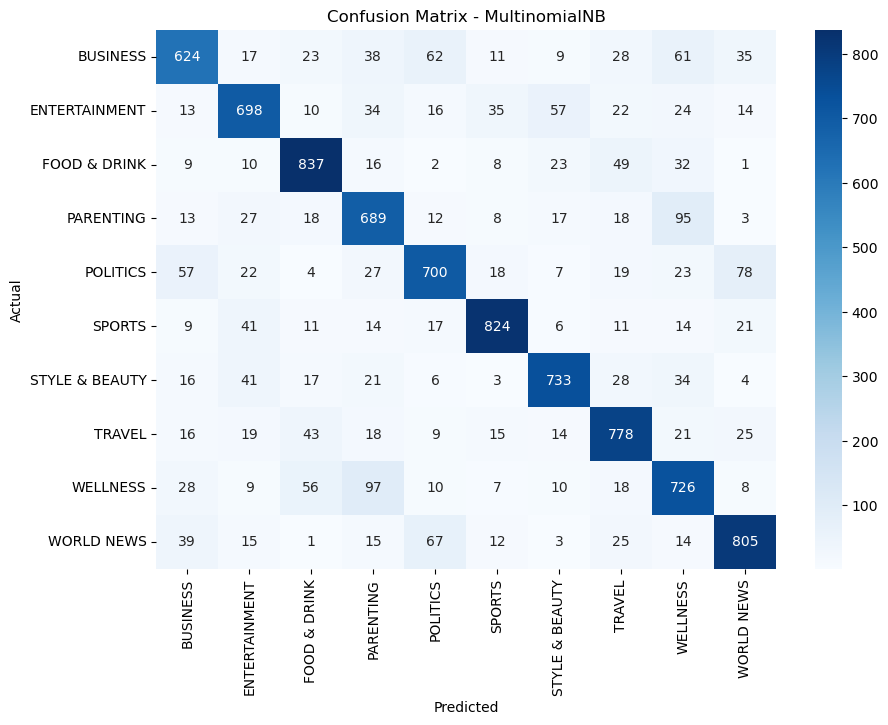

-----------------------------------------
Evaluating models with Bag-of-Words features:
Model: LogisticRegression
Cross-Validation Accuracy: 0.7711 (+/- 0.0046)
Test Accuracy: 0.7835639590155277
Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.75      0.80      0.78       908
 ENTERTAINMENT       0.75      0.75      0.75       923
  FOOD & DRINK       0.83      0.83      0.83       987
     PARENTING       0.77      0.74      0.75       900
      POLITICS       0.75      0.72      0.74       955
        SPORTS       0.86      0.91      0.89       968
STYLE & BEAUTY       0.84      0.83      0.83       903
        TRAVEL       0.79      0.76      0.77       958
      WELLNESS       0.71      0.71      0.71       969
    WORLD NEWS       0.79      0.77      0.78       996

      accuracy                           0.78      9467
     macro avg       0.78      0.78      0.78      9467
  weighted avg       0.78      0.78      0.78      

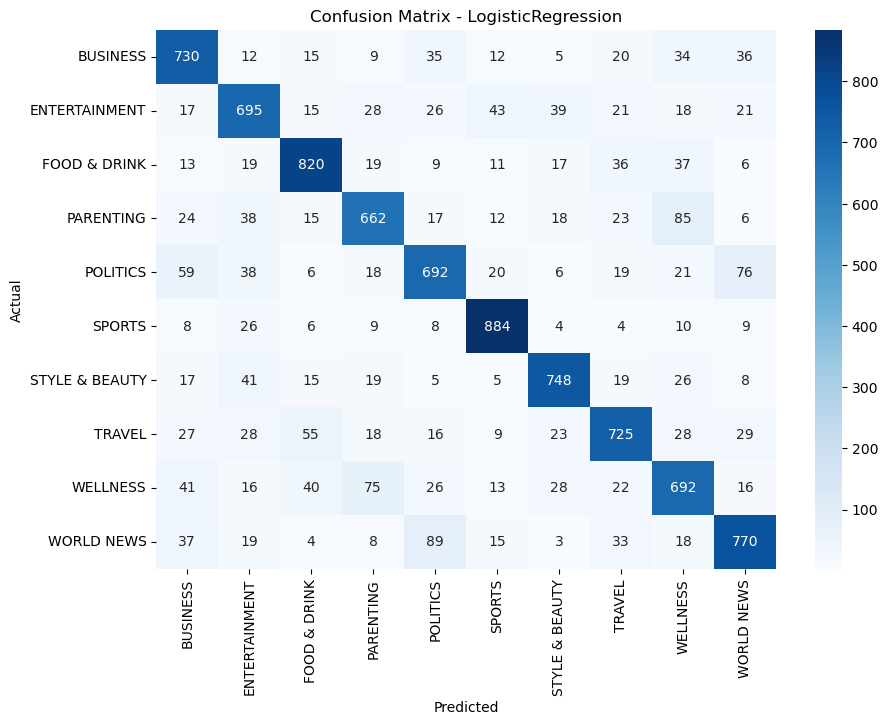

-----------------------------------------
Model: MultinomialNB
Cross-Validation Accuracy: 0.7720 (+/- 0.0052)
Test Accuracy: 0.7815569874300201
Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.76      0.68      0.72       908
 ENTERTAINMENT       0.76      0.76      0.76       923
  FOOD & DRINK       0.84      0.84      0.84       987
     PARENTING       0.69      0.77      0.73       900
      POLITICS       0.76      0.74      0.75       955
        SPORTS       0.88      0.85      0.86       968
STYLE & BEAUTY       0.84      0.81      0.82       903
        TRAVEL       0.78      0.81      0.79       958
      WELLNESS       0.70      0.75      0.72       969
    WORLD NEWS       0.81      0.80      0.81       996

      accuracy                           0.78      9467
     macro avg       0.78      0.78      0.78      9467
  weighted avg       0.78      0.78      0.78      9467



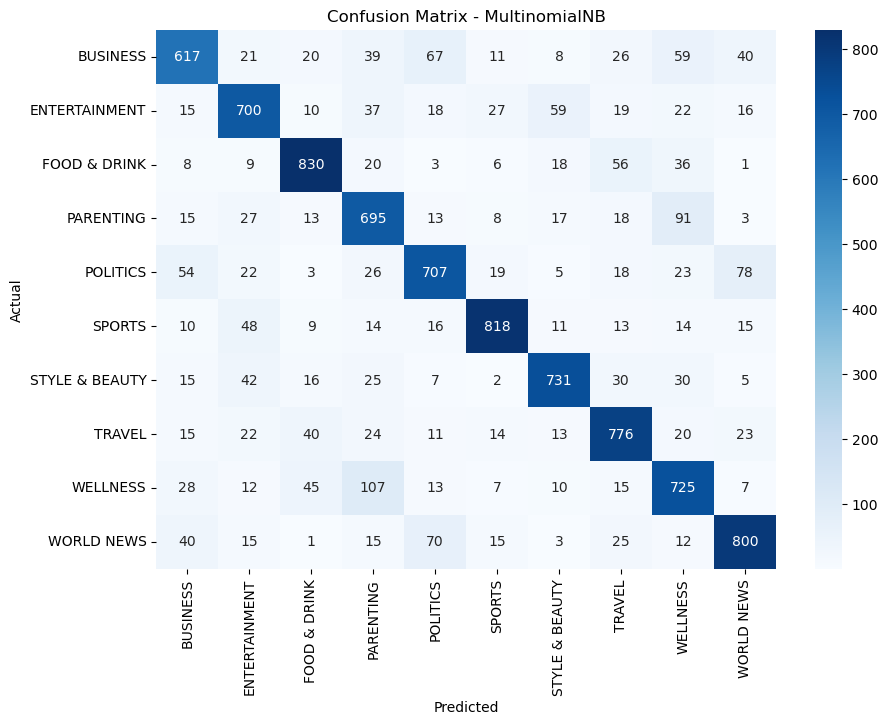

-----------------------------------------


In [54]:
# Train and Evaluate Models
models = [
    LogisticRegression(max_iter=200),
    MultinomialNB()
]

print("Evaluating models with TF-IDF features:")
for model in models:
    train_evaluate_model(model, X_train_tfidf, X_test_tfidf, y_train, y_test)

print("Evaluating models with Bag-of-Words features:")
for model in models:
    train_evaluate_model(model, X_train_bow, X_test_bow, y_train, y_test)

**After observing the execution and output of logistic regression, naive bayes and SVM, I came to the conclusion that:**
1. In case of TDF-IDF features, Logistic Regression model came on top regarding its cross validation, accuracy, precision, recall and f1-score.
2. In case of Bag-of-Words, both models perform equally well.
3. I did not consider SVM because it was taking too long to execute the code and providing the result. 